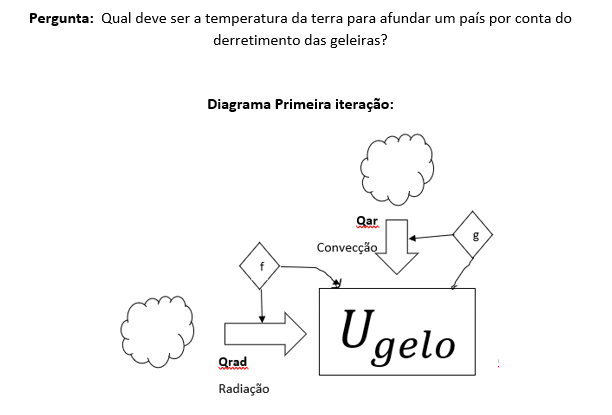

In [1]:
from IPython.display import Image
Image("primeira_iteração.png")

Na primeira iteração, foi percebido que essa parte de modelagem serve para massa constante apenas, ou seja, anterior ao derretimento, de modo que esse modelo ocorre até que o gelo chegue a zero graus


In [2]:
def Equacao1iteracao (Tgelo, t):
    Qrad=(e/albedo)*(I*(A*sin_teta))
    Qar=(A*hgelo)*(-Tgelo+Ta)
    dTdt=(1/(m*c))*(Qrad+Qar)
    return dTdt
    

In [3]:
import numpy as np

listaTempo=np.arange(0,100,0.001) #do ano 2000, até o ano de 2100. Logo, a escala está em anos.

e=0.97 #eficiencia de absorção
A=50.8*10**6 #m quadrado permafrost
hgelo=4.43 #W/m2*k
albedo=0.3 #unidade?
m=2.0030948*(10**10) #kg
#=10**7

sin_teta=0.39 #seno de 23 graus (ângulo de irradiação)
I=342.5 #irradiaçao media
c=0.5

Ta=388.15 #regiões que tem gelo, possuem temperatura ambiente baixa , logo, 0ºC, 273.15 Kelvin
Tgelo_inicial=253.15 #-20 celsius



In [ ]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt 

Tgelo=odeint(Equacao1iteracao,Tgelo_inicial,listaTempo)

index=0
tempo=0
for i in range (len(Tgelo)):
    if 273.15<Tgelo[i]<275:
        index=i
        tempo=listaTempo[i]
        
print(index)
print(tempo)

#plt.plot(listaTempo[:index], Tgelo[:index])
plt.plot(listaTempo, Tgelo)
plt.title('Temperatura do gelo ao longo do tempo')
plt.xlabel('Tempo')
plt.ylabel('Tgelo')
plt.grid(True)
plt.show

        

# Segunda iteração
Ocorre para massa variável já que há derretimento, logo não há mudança de temperatura pois o calor é absorvido na mudança de fase

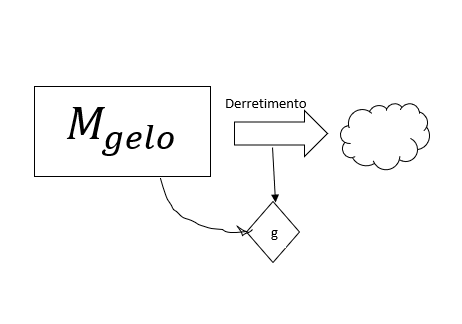

In [5]:
from IPython.display import Image
Image("segunda_iteraçao.png")

In [6]:
#segunda iteração
#quando a temperatura está maior que zero graus e começa a te derretimento

def derretimento (Mgelo, t):
    Qrad=(e/albedo)*(I*(A*sin_teta))
    Qar=(A*hgelo)*(0-(273.15+(3/(3.15*10**6))*t))
    Ugelo=Qar+Qrad
    dMdt=Ugelo/l
    return dMdt


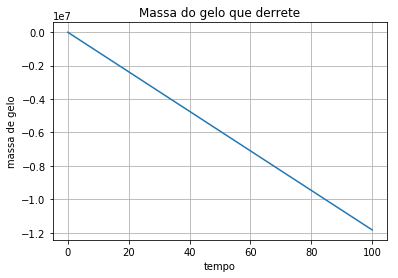

In [7]:
Mgelo_inicial=0
l=334000 #J/Kg (calor latente)
Ta=273.15

Mgelo=odeint(derretimento,Mgelo_inicial,listaTempo)


plt.plot(listaTempo, Mgelo)
plt.xlabel("tempo")
plt.ylabel("massa de gelo")
plt.title("Massa do gelo que derrete")
plt.grid(True)

# Converte massa de gelo para aumento do nivel do mar
A partir da massa derretida do gelo, sabe-se o volume e assim, a altura do incremento


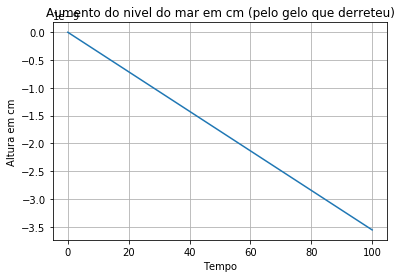

In [8]:
#pegar a massa de gelo derretida e converter para a altura que ela representa em aumento do nivel do mar

densidade=917 #kg por metro cubico
area=3.628*10**14   #metro quadrado
Altura_aumento=[]
for e in Mgelo:
    Vgelo=e/densidade
    altura_aumento=Vgelo*100/area
    Altura_aumento.append(altura_aumento) # unidade de gelo derretido em cm quadrado (unidade igual a de validação)

plt.plot(listaTempo, Altura_aumento)
plt.xlabel("Tempo")
plt.ylabel("Altura em cm")
plt.title("Aumento do nivel do mar em cm (pelo gelo que derreteu)")
plt.grid(True)


# Dilatação do volume derretido:
Fórmula dilatação: DeltaV= V0*gama*deltaT

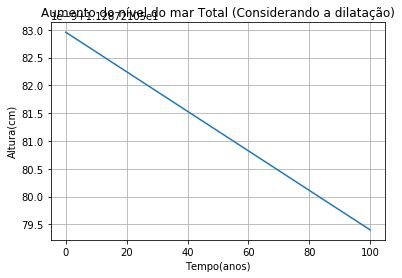

In [ ]:
Vi=10.5*10**15
gama=1.3*10**-4
Tf=283.15
Ti=253.15

def dilatacao(Vi, Tf):
    delta_volume=(Vi*gama*(Tf-Ti))
    delta_volume_total= (area*Altura_aumento[-1]*gama*(Tf-Ti))
    altura_dilatada=(delta_volume+delta_volume_total)*100/area
    return altura_dilatada

aumento_do_mar=[]
for e in Altura_aumento:
    aumento_do_mar.append(dilatacao(Vi,Tf)+e)

plt.plot(listaTempo,aumento_do_mar)
plt.title('Aumento do nível do mar Total (Considerando a dilatação)')
plt.xlabel('Tempo(anos)')
plt.ylabel('Altura(cm)')
plt.grid(True)
plt.show()

# Esse aumento foi feito somento com a dilatação da água do mar
não foi incluido o incremento gerado pelo mar, mas este é pequeno já que a escala é pequena

In [ ]:
Temp=np.arange(273.15, 400.15, 10)
matadora=[]
aumento_por_temp=[]
for T in Temp:
    Ta=T
    aumento_por_temp=[]
    massa=odeint(derretimento,Mgelo_inicial,listaTempo)
    for e in massa:
        Vgelo=e/densidade
        altura_aumento=Vgelo*100/area
        Altura_aumento.append(altura_aumento)
        for i in Altura_aumento:
            aumento_por_temp.append(dilatacao(Vi,T)+i)
    plt.plot(listaTempo, aumento_por_temp)
    matadora.append(aumento_por_temp[-1])

plt.grid(True)
plt.title("Aumento do nivel do mar para diferentes temperaturas")
plt.xlabel('Tempo')
plt.ylabel('Aumwnto do nivel do mar em cm')
plt.show()

plt.plot(Temp, matadora, "bo")
plt.title('Aumento do nivel do mar para diferentes temperaturas da Terra')
plt.xlabel("Temperatura da Terra")
plt.ylabel('Aumento do nivel do mar')
plt.grid(True)
plt.show()

# Validação:
Dados reais

In [ ]:
#dados reais

listatempoAnos=[1990.3452,
1995.5251,
2000.244,
2005.1932,
2010.1414,
2015.0895,
2020.2672,
2025.676,
2030.1635,
2035.3405,
2041.3239,
2046.1553,
2050.5264,
2054.784,
2060.6501,
2066.2876,
2069.8525,
2074.6836,
2080.7805,
2085.9565,
2090.6726,
2094.9282,
2098.149,
2100.22]

listaAumento=[0.19135147,1.9242336,3.8442986,5.765555,8.255506,10.745457,13.615729,16.108063,18.59563,21.845034,25.098604,28.34622,31.401888,33.6987,37.8995,41.34085,
44.39235,47.82953,51.841957,55.660053,59.096638,62.341278,64.63273,65.78084]





plt.plot(listatempoAnos, listaAumento, 'bo')
#plt.plot(listatempoAnos,aumento_por_temp[1:])
plt.grid(True)
plt.title('Aumento do nível do mar em cm')
plt.xlabel('tempo')
plt.ylabel('aumento do nivel do mar')
plt.show